In [14]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import statsmodels.api as sm

In [15]:
df = pd.read_csv('RRCA_baseflow.csv')
input_df = df.drop(['Observed'], axis=1)
output_df = df[['Observed']]
df.head(5)

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [24]:
df_LR = LR(fit_intercept = True)
display(input_df.shape, output_df.shape)
df_LR.fit(input_df, output_df)
display(df_LR.score(input_df, output_df))
input_df = sm.add_constant(input_df)
model = sm.OLS(output_df, input_df)
results = model.fit()
display(results.pvalues)

(15591, 8)

(15591, 1)

0.23561219615552786

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                  5.802495e-71
Date                  1.236333e-134
Segment_id             0.000000e+00
x                      4.912426e-04
y                      9.603538e-10
Evapotranspiration     1.011407e-05
Precipitation          0.000000e+00
Irrigation_pumping     1.009044e-02
dtype: float64

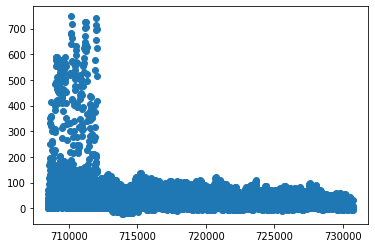

In [4]:
general_plot_df = df[['Date', 'Observed']]
general_plot_df.head(5)
plt.figure()
plt.scatter(general_plot_df.Date.values, general_plot_df.Observed.values)

# Breaking it down into river segments

In [45]:
data_frame_list = []
r_scores_for_each_segment = []
all_grid_scores = []
columns = ['x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping']
for segment in df.Segment_id.unique():
    [53, 152, 159, 171, 123]
    if segment == 53 or segment == 152 or segment == 159 or segment == 171 or segment == 123 or segment == 196:
        current_segment = df[df.Segment_id == segment]
        segment_input = current_segment.drop(['Observed'], axis=1)
        segment_output = current_segment[['Observed']]
        segment_LR = LR()
        segment_LR.fit(segment_input, segment_output)
        r_scores_for_each_segment.append(segment_LR.score(segment_input, segment_output))

        grid_results = []
        for j in columns:
            new_input = current_segment[[j]]
            #display(new_input.shape, segment_output.shape)
            grid_LR = LR()
            grid_LR.fit(new_input, segment_output)
            grid_results.append(grid_LR.score(new_input, segment_output))
        grid1, grid2, grid3, grid4, grid5 = grid_results[0], grid_results[1], grid_results[2], grid_results[3], grid_results[4]
        all_grid_scores.append(grid_results)

        input_df = sm.add_constant(segment_input)
        model = sm.OLS(segment_output, input_df)
        results = model.fit()
        print('\nRiver Segment\n', segment, '\n', results.pvalues, 'r score\n', segment_LR.score(segment_input, segment_output))
    #    print(results.summary(), 'and this is the r square value ', segment_LR.score(segment_input, segment_output))

    #     test_df = current_segment[['Evapotranspiration', 'Precipitation']]
    #     display(test_df.head(5))
        other_grid = []
    #     for k in range(3):
    #         for x in range(3):
    #             if x <= k:
    #                 continue
    #             else:
    #                 new_df = current_segment[[columns[k], columns[x]]]
    #                 other_grid_LR = LR()
    #                 other_grid_LR.fit(new_df, segment_output)
    #                 other_grid.append(other_grid_LR.score(new_df, segment_output))
    #     other_grid1, other_grid2, other_grid3 = other_grid[0], other_grid[1], other_grid[2]
        data_frame_list.append([segment, grid1, grid2, grid3, grid4, grid5, segment_LR.score(segment_input, segment_output)])
                
#display(df.Segment_id.unique(), df.Segment_id.unique().shape, r_scores_for_each_segment)
#display('all the grid scores\n', all_grid_scores)
column_df = ['segmentId', 'x', 'y', 'Evapotranspiration', 'Precipitation',
             'IrrigationPumping', 'all5Used']
full_df = pd.DataFrame(data_frame_list, columns = column_df)
#full_df.save_csv(index = False)


D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-


River Segment
 171 
 Date                  1.683321e-09
Segment_id            9.614310e-03
x                     5.478139e-09
y                     8.727658e-08
Evapotranspiration    7.181255e-01
Precipitation         5.614522e-15
Irrigation_pumping    2.108352e-01
dtype: float64 r score
 0.09507460484814512

River Segment
 152 
 Date                  0.000053
Segment_id            0.126155
x                     0.177384
y                     0.021055
Evapotranspiration    0.881384
Precipitation         0.000052
Irrigation_pumping    0.004252
dtype: float64 r score
 0.40416695953105497

River Segment
 53 
 Date                  5.102032e-02
Segment_id            5.345350e-18
x                     4.133208e-61
y                     3.637192e-04
Evapotranspiration    5.403726e-05
Precipitation         1.748868e-04
Irrigation_pumping    3.532663e-22
dtype: float64 r score
 0.8306475939227601

River Segment
 123 
 Date                  0.855963
Segment_id            0.856392
x            

D:\Spyder\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Spyder\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Spyder\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [54]:
full_df.head(15)


,segmentId,x,y,Evapotranspiration,Precipitation,IrrigationPumping,all5Used
0,171,0.002638,0.002638,0.002342,0.025051,0.005618,0.095075
1,152,0.328593,0.328593,0.128574,0.358144,0.019181,0.404167
2,53,0.622601,0.622601,0.111467,0.000078,0.010844,0.830648
3,123,0.000000,0.000000,0.675050,0.121063,0.000000,0.937805
4,159,0.134058,0.134058,0.223317,0.026936,0.054653,0.522627
5,196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016


In [42]:
full_df.nlargest(5, ['x', 'y', 'Evapotranspiration', 'Precipitation', 'IrrigationPumping', 'all5Used'])

,segmentId,x,y,Evapotranspiration,Precipitation,IrrigationPumping,all5Used
12,53,0.622601,0.622601,0.111467,0.000078,0.010844,0.830648
4,152,0.328593,0.328593,0.128574,0.358144,0.019181,0.404167
32,159,0.134058,0.134058,0.223317,0.026936,0.054653,0.522627
3,171,0.002638,0.002638,0.002342,0.025051,0.005618,0.095075
13,123,0.000000,0.000000,0.675050,0.121063,0.000000,0.937805


In [53]:
test = results.pvalues
# test.head()
full_df.head(7)

,segmentId,x,y,Evapotranspiration,Precipitation,IrrigationPumping,all5Used
0,171,0.002638,0.002638,0.002342,0.025051,0.005618,0.095075
1,152,0.328593,0.328593,0.128574,0.358144,0.019181,0.404167
2,53,0.622601,0.622601,0.111467,0.000078,0.010844,0.830648
3,123,0.000000,0.000000,0.675050,0.121063,0.000000,0.937805
4,159,0.134058,0.134058,0.223317,0.026936,0.054653,0.522627
5,196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016
